<a href="https://colab.research.google.com/github/ARBML/adawat/blob/main/notebooks/ArbEngVec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ArbEngVec : Arabic-English Cross-Lingual Word Embedding Model

## Setups:

In [ ]:
%%time

!apt-get -qq update 
!pip install -q selenium
!pip install -q python-bidi
!pip install -q --upgrade requests
!pip install -q --upgrade arabic-reshaper
!apt-get -qq install chromium-chromedriver 
!cp /usr/lib/chromium-browser/chromedriver /usr/bin 2>/dev/null

CPU times: user 152 ms, sys: 59.5 ms, total: 212 ms
Wall time: 19.8 s


## Automatically Download All Models:

In [ ]:
import sys 
import os , os.path
from time import sleep
from selenium import webdriver

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

downloads = {"download.default_directory" : f"{os.getcwd()}"}
chrome_options.add_experimental_option("prefs", downloads)

driver = webdriver.Chrome('chromedriver',options=chrome_options)

try: # To automatically download all the zipped files/models using `Selenium` library!
  driver.get("https://drive.google.com/drive/folders/1S2ugc8pZshYD3mTAkShKoA7He4Ih4gnS")
  driver.find_element_by_class_name("h-sb-Ic.h-R-d.a-c-d.a-r-d.a-R-d").click()
  sleep(3)
  print('# Downloading Zipped Models ...')
  print('  * Wait until 7 Zip Files Downloaded !!!')
  print('    - This might take a while, be patient :-)')
except AttributeError: # If automatic download fails, plz download them manually!
  print('# Please, Download then Upload the Zipped Models Manually From Here:')
  print('  https://drive.google.com/drive/folders/1S2ugc8pZshYD3mTAkShKoA7He4Ih4gnS')

# Please, Download then Upload the Zipped Models Manually From Here:
  https://drive.google.com/drive/folders/1S2ugc8pZshYD3mTAkShKoA7He4Ih4gnS


### If the Automatic Download Fails, Please Download Models Manually:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir(r'/content/drive/My Drive/')

Mounted at /content/drive


### Copy All Manually Downloaded Models Locally (here):

In [ ]:
%cp -av ArbEngVec/ /content/ArbEngVec
%cd /content/ArbEngVec

'ArbEngVec/' -> '/content/ArbEngVec'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-007.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-007.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-006.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-006.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-002.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-002.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-001.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-001.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-003.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-003.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-004.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-004.zip'
'ArbEngVec/ArbEngVec gensim-20221012T024542Z-005.zip' -> '/content/ArbEngVec/ArbEngVec gensim-20221012T024542Z-005.zip'
/content/ArbEngVec


## Unzip then Delete the Downloaded Models Locally (to save space):

In [ ]:
%ls -lah *.zip

!unzip -qo 'ArbEngVec gensim-*-001.zip' 
!unzip -qo 'ArbEngVec gensim-*-002.zip' 
!unzip -qo 'ArbEngVec gensim-*-003.zip' 
!unzip -qo 'ArbEngVec gensim-*-004.zip' 
!unzip -qo 'ArbEngVec gensim-*-005.zip' 
!unzip -qo 'ArbEngVec gensim-*-006.zip' 
!unzip -qo 'ArbEngVec gensim-*-007.zip' 

%rm -rf *.zip

-rw------- 1 root root 1.8G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-001.zip'
-rw------- 1 root root 1.8G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-002.zip'
-rw------- 1 root root 1.8G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-003.zip'
-rw------- 1 root root 1.8G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-004.zip'
-rw------- 1 root root 1.8G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-005.zip'
-rw------- 1 root root 1.7G Oct 12 02:55 'ArbEngVec gensim-20221012T024542Z-006.zip'
-rw------- 1 root root 681M Oct 12 02:51 'ArbEngVec gensim-20221012T024542Z-007.zip'


## Load __ArbEngVec__ Models:

In [ ]:
%%time

import sys , re
import numpy as np
import arabic_reshaper
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from bidi.algorithm import get_display

import warnings, os
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

model_1 = Word2Vec.load("ArbEngVec gensim/ParallelAlign_Skip/nonshuffle_5window_skipgram_300size.model")
model_2 = Word2Vec.load("ArbEngVec gensim/ParallelAlign_CBOW/nonshuffle_5window_cbow_300size.model")
model_3 = Word2Vec.load("ArbEngVec gensim/WordByWord_Skip/wordbywordshuffle_5window_skipgram_300size.model")
model_4 = Word2Vec.load("ArbEngVec gensim/WordByWord_CBOW/wordbywordshuffle_5window_cbow_300size.model")
model_5 = Word2Vec.load("ArbEngVec gensim/RandomShuffle_Skip/randshuffle_5window_skipgram_300size.model")
model_6 = Word2Vec.load("ArbEngVec gensim/RandomShuffle_CBOW/randshuffle_5window_cbow_300size.model")

CPU times: user 21.5 s, sys: 16.1 s, total: 37.7 s
Wall time: 1min 14s


## Apply `t-SNE`:

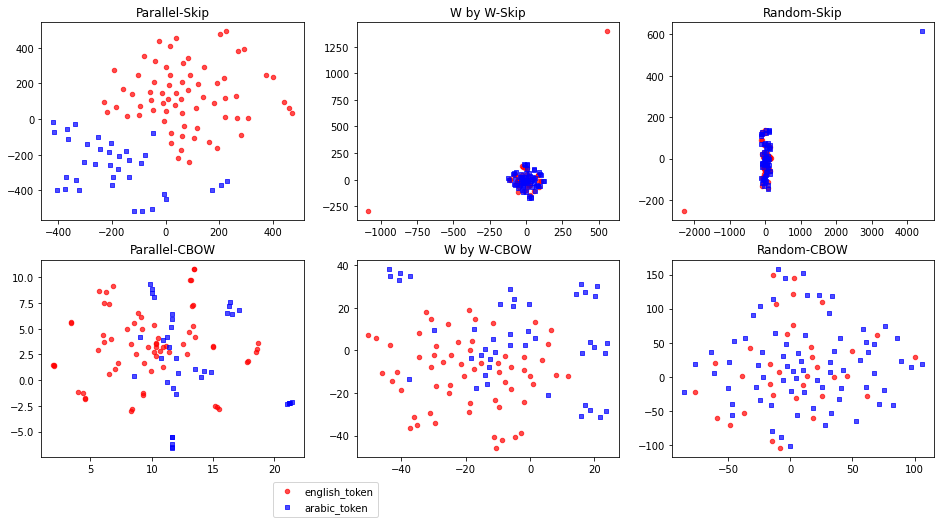

In [ ]:
myModels = ["ArbEngVec gensim/ParallelAlign_Skip/nonshuffle_5window_skipgram_300size.model", 
            "ArbEngVec gensim/ParallelAlign_CBOW/nonshuffle_5window_cbow_300size.model", 
            "ArbEngVec gensim/WordByWord_Skip/wordbywordshuffle_5window_skipgram_300size.model", 
            "ArbEngVec gensim/WordByWord_CBOW/wordbywordshuffle_5window_cbow_300size.model", 
            "ArbEngVec gensim/RandomShuffle_Skip/randshuffle_5window_skipgram_300size.model", 
            "ArbEngVec gensim/RandomShuffle_CBOW/randshuffle_5window_cbow_300size.model"]

keys = ['meeting', 'النووىه', 'malaysia', 'الاطراف', 'treaty', 'انتشار', 'adoption', 'states', 'ونرحب', 'conference', 'secretary', 
        'paragraph', 'framework', 'الثامنه', 'implement', 'المتحده', 'statement', 'طلب', 'security', 'america', 'council']
        
positionDictionary = {0: (0,0), 1: (1,0), 2: (0,1), 3: (1,1), 4: (0,2), 5: (1,2)}
titlesDictionary = {0: 'Parallel-Skip', 1: 'Parallel-CBOW', 2: 'W by W-Skip', 3: 'W by W-CBOW', 4: 'Random-Skip', 5: 'Random-CBOW'}
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 8))

for ii, model in enumerate(myModels):
  model = Word2Vec.load(model)
  embedding_clusters = []
  word_clusters = []
  for word in keys:
    embeddings = []
    embeddings.append(model.wv[word])
    words = []
    similar_word_i = arabic_reshaper.reshape(word)
    similar_word_i = get_display(similar_word_i)
    words.append(word)
    for similar_word, _ in model.wv.most_similar(word, topn = 4):
      similar_word_i = arabic_reshaper.reshape(similar_word)
      similar_word_i = get_display(similar_word_i)
      words.append(similar_word)
      embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
  
  embedding_clusters = np.array(embedding_clusters)
  word_clusters = np.ravel(np.array(word_clusters))
  n, m, k = embedding_clusters.shape

  tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='random', n_iter=3500, random_state=0)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k)))
  
  arabicWordPattern = re.compile(r'[\u0600-\u06FF]+')
  AR = []
  EN = []
  for i, word in enumerate(word_clusters):
    if arabicWordPattern.search(word) == None:
      EN.append((word, embeddings_en_2d[i][0], embeddings_en_2d[i][1]))
    else:
      AR.append((word, embeddings_en_2d[i][0], embeddings_en_2d[i][1]))
  
  
  ax[positionDictionary[ii][0],positionDictionary[ii][1]].scatter([en[1] for en in EN], [en[2] for en in EN], c = 'red', alpha = 0.7, s = 20, marker = 'o', label = 'english_token')
  ax[positionDictionary[ii][0],positionDictionary[ii][1]].scatter([ar[1] for ar in AR], [ar[2] for ar in AR], c = 'blue', alpha = 0.7, s = 20, marker = 's', label = 'arabic_token')
  ax[positionDictionary[ii][0],positionDictionary[ii][1]].set_title(titlesDictionary[ii])

plt.legend(bbox_to_anchor=(-1.1, -0.1))
plt.show()

## Visualize Word Clusters:

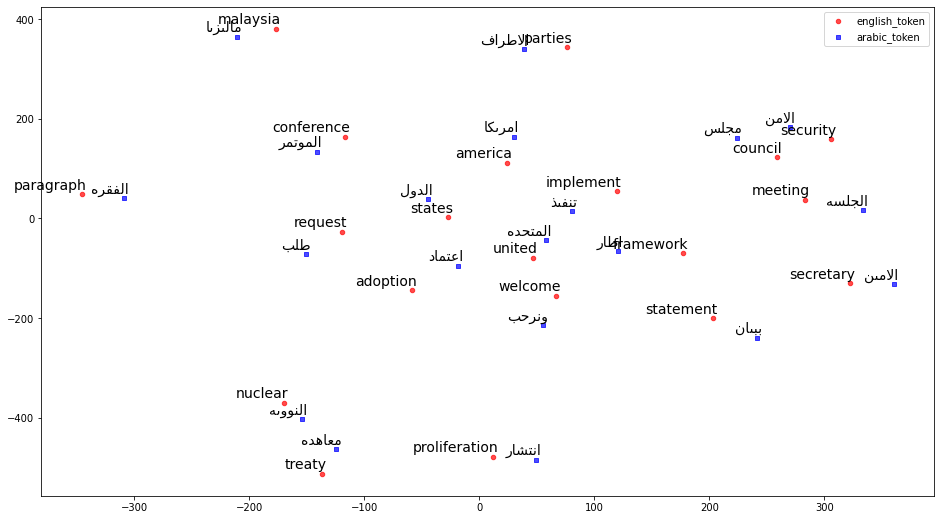

In [ ]:
embedding_clusters = np.array(embedding_clusters)
word_clusters = np.ravel(np.array(word_clusters))
n, m, k = embedding_clusters.shape

tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='random', n_iter=3500, random_state=0)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k)))

keys = ['meeting', 'النووىه', 'malaysia', 'الاطراف', 'treaty', 'انتشار', 'adoption', 'states', 'ونرحب', 'conference', 
        'secretary', 'paragraph', 'framework', 'implement', 'المتحده', 'statement', 'طلب', 'security', 'america', 'council']
        
plt.figure(figsize=(16, 9))
model = Word2Vec.load("ArbEngVec gensim/RandomShuffle_Skip/randshuffle_5window_skipgram_300size.model")
embedding_clusters = []
word_clusters = []
for word in keys:
  embeddings = []
  embeddings.append(model.wv[word])
  words = []
  similar_word_i = arabic_reshaper.reshape(word)
  similar_word_i = get_display(similar_word_i)
  words.append(word)
  for similar_word, _ in model.wv.most_similar(word, topn = 1):
    similar_word_i = arabic_reshaper.reshape(similar_word)
    similar_word_i = get_display(similar_word_i)
    words.append(similar_word)
    embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
  
embedding_clusters = np.array(embedding_clusters)
word_clusters = np.ravel(np.array(word_clusters))
n, m, k = embedding_clusters.shape

tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='random', n_iter=3500, random_state=0)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k)))
  
arabicWordPattern = re.compile(r'[\u0600-\u06FF]+')
AR = []
EN = []
for i, word in enumerate(word_clusters):
  if arabicWordPattern.search(word) == None:
    EN.append((word, embeddings_en_2d[i][0], embeddings_en_2d[i][1]))
  else:
    AR.append((word, embeddings_en_2d[i][0], embeddings_en_2d[i][1]))  
plt.scatter([en[1] for en in EN], [en[2] for en in EN], c = 'red', alpha = 0.7, s = 20, marker = 'o', label = 'english_token')
plt.scatter([ar[1] for ar in AR], [ar[2] for ar in AR], c = 'blue', alpha = 0.7, s = 20, marker = 's', label = 'arabic_token')
  
for i, word in enumerate(word_clusters):
  word = arabic_reshaper.reshape(word)
  word = get_display(word)
  plt.annotate(word, alpha=1, xy=(embeddings_en_2d[i][0], embeddings_en_2d[i][1]), xytext = (5, 2), textcoords = 'offset points', ha = 'right', va = 'bottom', size = 14)

plt.legend(loc = 0)
plt.show()

## Get Cross-lingual Most Similar Words

In [ ]:
V = []
for word in model_5.wv.vocab:
  V.append(word)

for i in range(50):
  for similar, _ in model_5.wv.most_similar(V[i], topn = 1):
    print(f'{V[i]} :: {similar}') 

يسم :: auer
name :: maghsoudi
الله :: armaneh
god :: سىثىبك
الرحمان :: soheib
merciful :: ىباركنا
الرحيم :: الىابانى
الجلسه :: meeting
may :: negarse
delegation :: ىشاطركم
plenary :: وستعتقد
مقدم :: codice
النووىه :: nuclear
statement :: ببىان
مالىزىا :: malaysia
الاسلحه :: weapons
باسم :: bushusha
عدم :: اماعه
parties :: الاطراف
العامه :: assembly
بىان :: statement
معاهده :: النووىه
وفد :: بوىالتى
treaty :: معاهده
group :: العامل
المعاهده :: npt
عام :: لىناهز
non :: organizationsb
انتشار :: proliferation
نىوىورك :: york
adoption :: اعتماد
بشان :: terrorisma
اقرار :: وتسعده
new :: جدىده
proliferation :: انتشار
agenda :: جدول
الانحىاز :: aligned
لموتمر :: مالف
conference :: الموتمر
weapons :: اسلحه
جدول :: agenda
states :: الدول
دول :: states
aligned :: الانحىاز
review :: استعراض
لاستعراض :: واخترتم
مجموعه :: مللوك
الاعمال :: agenda
الاطراف :: parties
york :: نىوىورك


\* __Disclaimer:__ <br> This notebook is a modified version from: 
https://colab.research.google.com/drive/1pR6vcFrG74drpp2Jrbab5UZIcFfQrLW9?usp=sharing